### Bibliotecas

In [165]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


### Dados do INEP

#### Visualizar as primeiras linhas

In [184]:
import pandas as pd

df = pd.read_csv('enade.csv', sep=';', encoding='latin1', header=None)
print(df.head(10).to_string())

df.columns = df.iloc[0]
df = df[1:]




     0               1                        2               3              4                                                               5              6                                                    7                            8                9                     10                     11                    12              13                           14                                15               16                     17               18                     19                         20                      21
0   Ano  Código da Área        Área de Avaliação  Grau Acadêmico  Código da IES                                                    Nome da IES*  Sigla da IES*                                Organização Acadêmica     Categoria Administrativa  Código do Curso  Modalidade de Ensino  Código do Município**  Município do Curso**  Sigla da UF**   Nº de Concluintes Inscritos  Nº  de Concluintes Participantes  Nota Bruta - FG  Nota Padronizada - FG  Nota Bruta - CE  Not

In [185]:
print(df.columns.tolist())


['Ano', 'Código da Área', 'Área de Avaliação', 'Grau Acadêmico', 'Código da IES', 'Nome da IES*', 'Sigla da IES*', 'Organização Acadêmica', 'Categoria Administrativa', 'Código do Curso', 'Modalidade de Ensino', 'Código do Município**', 'Município do Curso**', 'Sigla da UF** ', 'Nº de Concluintes Inscritos', 'Nº  de Concluintes Participantes', 'Nota Bruta - FG', 'Nota Padronizada - FG', 'Nota Bruta - CE', 'Nota Padronizada - CE', 'Conceito Enade (Contínuo)', 'Conceito Enade (Faixa)']


In [186]:
print(df.head().to_string())



0   Ano Código da Área        Área de Avaliação Grau Acadêmico Código da IES                                                    Nome da IES* Sigla da IES*                                Organização Acadêmica     Categoria Administrativa Código do Curso Modalidade de Ensino Código do Município** Município do Curso** Sigla da UF**  Nº de Concluintes Inscritos Nº  de Concluintes Participantes Nota Bruta - FG Nota Padronizada - FG Nota Bruta - CE Nota Padronizada - CE Conceito Enade (Contínuo) Conceito Enade (Faixa)
1  2023           6002  ENGENHARIA DE ALIMENTOS    Bacharelado           699                       FUNDAÇÃO UNIVERSIDADE FEDERAL DE RONDÔNIA          UNIR                                         Universidade              Pública Federal          116776  Educação Presencial               1100023            Ariquemes             RO                           4                                4           50,55           2,123411382           42,75           2,107348703              

#### Descrição

##### O conjunto de dados utilizado foi extraído do INEP (ENADE) e contém informações sobre cursos superiores, incluindo ano, área de avaliação, instituição, município, notas brutas e padronizadas, e conceito ENADE. Esses dados são úteis para análise de desempenho acadêmico em todo o Brasil.

### Limpeza e seleção dos dados

#### Informação geral

In [187]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9815 entries, 1 to 9815
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Ano                               9814 non-null   object
 1   Código da Área                    9812 non-null   object
 2   Área de Avaliação                 9812 non-null   object
 3   Grau Acadêmico                    9812 non-null   object
 4   Código da IES                     9812 non-null   object
 5   Nome da IES*                      9812 non-null   object
 6   Sigla da IES*                     8567 non-null   object
 7   Organização Acadêmica             9812 non-null   object
 8   Categoria Administrativa          9812 non-null   object
 9   Código do Curso                   9812 non-null   object
 10  Modalidade de Ensino              9812 non-null   object
 11  Código do Município**             9812 non-null   object
 12  Município do Curso**

#### Estatística básica

In [188]:
print(df.describe())


0        Ano Código da Área Área de Avaliação Grau Acadêmico Código da IES  \
count   9814           9812              9812           9812          9812   
unique     3             28                28              2          1347   
top     2023             23        ENFERMAGEM    Bacharelado           322   
freq    9812            976               976           9079           263   

0                Nome da IES* Sigla da IES* Organização Acadêmica  \
count                    9812          8567                  9812   
unique                   1347          1015                     5   
top     UNIVERSIDADE PAULISTA          UNIP          Universidade   
freq                      263           263                  3709   

0          Categoria Administrativa Código do Curso  ... Município do Curso**  \
count                          9812            9812  ...                 9812   
unique                            7            9812  ...                  712   
top     Privada com 

#### Verificação de valores ausentes

In [189]:
for col in df.columns:
    print(f"'{col}'")


'Ano'
'Código da Área'
'Área de Avaliação'
'Grau Acadêmico'
'Código da IES'
'Nome da IES*'
'Sigla da IES*'
'Organização Acadêmica'
'Categoria Administrativa'
'Código do Curso'
'Modalidade de Ensino'
'Código do Município**'
'Município do Curso**'
'Sigla da UF** '
'Nº de Concluintes Inscritos'
'Nº  de Concluintes Participantes'
'Nota Bruta - FG'
'Nota Padronizada - FG'
'Nota Bruta - CE'
'Nota Padronizada - CE'
'Conceito Enade (Contínuo)'
'Conceito Enade (Faixa)'


In [190]:
valores_ausentes = df.isnull().sum()

print(valores_ausentes)



0
Ano                                    1
Código da Área                         3
Área de Avaliação                      3
Grau Acadêmico                         3
Código da IES                          3
Nome da IES*                           3
Sigla da IES*                       1248
Organização Acadêmica                  3
Categoria Administrativa               3
Código do Curso                        3
Modalidade de Ensino                   3
Código do Município**                  3
Município do Curso**                   3
Sigla da UF**                          3
Nº de Concluintes Inscritos            3
Nº  de Concluintes Participantes       3
Nota Bruta - FG                      435
Nota Padronizada - FG                435
Nota Bruta - CE                      435
Nota Padronizada - CE                435
Conceito Enade (Contínuo)            435
Conceito Enade (Faixa)                 3
dtype: int64


#### Colunas relevantes

In [191]:
colunas_relevantes = [
    'Ano',
    'Área de Avaliação',
    'Grau Acadêmico',
    'Organização Acadêmica',
    'Categoria Administrativa',
    'Modalidade de Ensino',
    'Município do Curso**',
    'Sigla da UF** ',
    'Nº de Concluintes Inscritos',
    'Nº  de Concluintes Participantes',
    'Conceito Enade (Faixa)'
]

In [192]:
df = df[colunas_relevantes]


In [193]:
df

,Ano,Área de Avaliação,Grau Acadêmico,Organização Acadêmica,Categoria Administrativa,Modalidade de Ensino,Município do Curso**,Sigla da UF**,Nº de Concluintes Inscritos,Nº de Concluintes Participantes,Conceito Enade (Faixa)
1,2023,ENGENHARIA DE ALIMENTOS,Bacharelado,Universidade,Pública Federal,Educação Presencial,Ariquemes,RO,4,4,3
2,2023,AGRONOMIA,Bacharelado,"Instituto Federal de Educação, Ciência e Tecno...",Pública Federal,Educação Presencial,Ariquemes,RO,34,34,4
3,2023,ENGENHARIA CIVIL,Bacharelado,Centro Universitário,Privada com fins lucrativos,Educação Presencial,Ariquemes,RO,24,21,2
4,2023,ENFERMAGEM,Bacharelado,Centro Universitário,Privada com fins lucrativos,Educação Presencial,Ariquemes,RO,35,34,2
5,2023,FARMÁCIA,Bacharelado,Centro Universitário,Privada com fins lucrativos,Educação Presencial,Ariquemes,RO,23,23,2
...,...,...,...,...,...,...,...,...,...,...,...
9811,2023,ENGENHARIA MECÂNICA,Bacharelado,Universidade,Pública Federal,Educação Presencial,Brasília,DF,76,64,5
9812,2023,FARMÁCIA,Bacharelado,Universidade,Pública Federal,Educação Presencial,Brasília,DF,45,42,4
9813,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9814,* Nome e Sigla da IES atualizados na data da d...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Verificar e remover valores ausentes

In [194]:
valores_ausentes = df.isnull().sum()
print(valores_ausentes)


0
Ano                                 1
Área de Avaliação                   3
Grau Acadêmico                      3
Organização Acadêmica               3
Categoria Administrativa            3
Modalidade de Ensino                3
Município do Curso**                3
Sigla da UF**                       3
Nº de Concluintes Inscritos         3
Nº  de Concluintes Participantes    3
Conceito Enade (Faixa)              3
dtype: int64


In [195]:
limite_ausentes = 10
colunas_remover = df.columns[df.isnull().sum() > limite_ausentes]
df = df.drop(columns=colunas_remover)
print("Colunas removidas:", colunas_remover.tolist())


Colunas removidas: []


In [196]:
print("Colunas restantes:", df.columns.tolist())


Colunas restantes: ['Ano', 'Área de Avaliação', 'Grau Acadêmico', 'Organização Acadêmica', 'Categoria Administrativa', 'Modalidade de Ensino', 'Município do Curso**', 'Sigla da UF** ', 'Nº de Concluintes Inscritos', 'Nº  de Concluintes Participantes', 'Conceito Enade (Faixa)']


### Groupby

#### Total de concluintes participantes por curso

In [197]:
total_participantes_por_area = df.groupby('Área de Avaliação')['Nº  de Concluintes Participantes'].sum().reset_index()

print(total_participantes_por_area)


                      Área de Avaliação  \
0                             AGRONOMIA   
1               ARQUITETURA E URBANISMO   
2                           BIOMEDICINA   
3                            ENFERMAGEM   
4                  ENGENHARIA AMBIENTAL   
5                      ENGENHARIA CIVIL   
6               ENGENHARIA DE ALIMENTOS   
7            ENGENHARIA DE COMPUTAÇÃO I   
8    ENGENHARIA DE CONTROLE E AUTOMAÇÃO   
9                ENGENHARIA DE PRODUÇÃO   
10                  ENGENHARIA ELÉTRICA   
11                 ENGENHARIA FLORESTAL   
12                  ENGENHARIA MECÂNICA   
13                   ENGENHARIA QUÍMICA   
14                             FARMÁCIA   
15                         FISIOTERAPIA   
16                       FONOAUDIOLOGIA   
17                             MEDICINA   
18                 MEDICINA VETERINÁRIA   
19                             NUTRIÇÃO   
20                          ODONTOLOGIA   
21           TECNOLOGIA EM AGRONEGÓCIOS   
22   TECNOL

### Visualizações

#### Gráfico de barras

In [198]:
total_participantes_por_area = df.groupby('Área de Avaliação')['Nº  de Concluintes Participantes'].sum().reset_index()

print(total_participantes_por_area)

                      Área de Avaliação  \
0                             AGRONOMIA   
1               ARQUITETURA E URBANISMO   
2                           BIOMEDICINA   
3                            ENFERMAGEM   
4                  ENGENHARIA AMBIENTAL   
5                      ENGENHARIA CIVIL   
6               ENGENHARIA DE ALIMENTOS   
7            ENGENHARIA DE COMPUTAÇÃO I   
8    ENGENHARIA DE CONTROLE E AUTOMAÇÃO   
9                ENGENHARIA DE PRODUÇÃO   
10                  ENGENHARIA ELÉTRICA   
11                 ENGENHARIA FLORESTAL   
12                  ENGENHARIA MECÂNICA   
13                   ENGENHARIA QUÍMICA   
14                             FARMÁCIA   
15                         FISIOTERAPIA   
16                       FONOAUDIOLOGIA   
17                             MEDICINA   
18                 MEDICINA VETERINÁRIA   
19                             NUTRIÇÃO   
20                          ODONTOLOGIA   
21           TECNOLOGIA EM AGRONEGÓCIOS   
22   TECNOL

C:\Users\vickg\AppData\Local\Temp\ipykernel_26184\1919823896.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(
C:\Users\vickg\AppData\Local\Temp\ipykernel_26184\1919823896.py:20: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


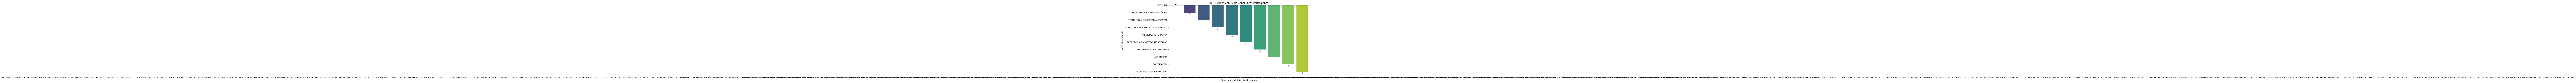

In [199]:
import matplotlib.pyplot as plt
import seaborn as sns

top_10 = total_participantes_por_area.sort_values(by='Nº  de Concluintes Participantes', ascending=False).head(10)

plt.figure(figsize=(12,6))
ax = sns.barplot(
    x='Nº  de Concluintes Participantes',
    y='Área de Avaliação',
    data=top_10,
    palette='viridis'
)

for i in ax.containers:
    ax.bar_label(i, fmt='%.0f', label_type='edge', padding=3)

plt.title('Top 10 Áreas com Mais Concluintes Participantes')
plt.xlabel('Total de Concluintes Participantes')
plt.ylabel('Área de Avaliação')
plt.tight_layout()
plt.savefig("grafico_top_10_areas.png", dpi=300)
plt.show()

In [201]:
df.to_csv('dadosEnade_tratados.csv', index=False)
